<a href="https://colab.research.google.com/github/manu-choraria/Employment-Retention-Prediction-Using-Linear-Regression/blob/main/Employment_Retention_Prediction_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#to import the file
import pandas as pd
csv_file=pd.read_csv("/content/Employee.csv")

#to print first 5 observations
csv_file.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
#to print last 5 observations
csv_file.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [ ]:
#to print information about dataset
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
#to get data insights by dividing the dataset into leaving and not leaving and displaying average of each attribute
leaving=csv_file.groupby('LeaveOrNot')
leaving.mean()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
LeaveOrNot,,,,
0,2014.817884,2.778578,29.571896,2.940059
1,2015.530625,2.545000,29.052500,2.840000


In [ ]:
#to understand the given data
csv_file.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


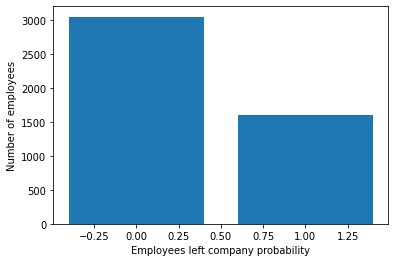

In [ ]:
#to plot employees left with experience of employees who left
import matplotlib.pyplot as plt
leave_count=csv_file.groupby('LeaveOrNot').count()
plt.bar(leave_count.index.values,leave_count['ExperienceInCurrentDomain'])
plt.xlabel('Employees left company probability')
plt.ylabel("Number of employees")
plt.show()

In [ ]:
#To display number of employees left or not
csv_file.LeaveOrNot.value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

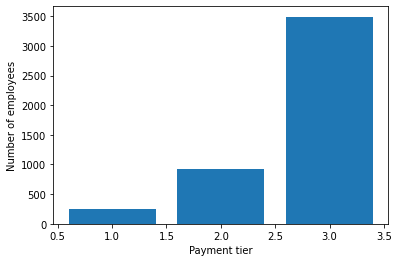

In [ ]:
#to plot salary with experience in current domain
salary_count=csv_file.groupby('PaymentTier').count()
plt.bar(salary_count.index.values,salary_count['ExperienceInCurrentDomain'])
plt.xlabel('Payment tier')
plt.ylabel("Number of employees")
plt.show()

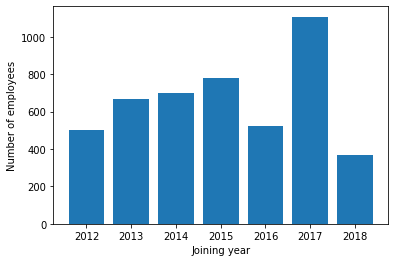

In [ ]:
#to plot joining year with number of employees
joining_year=csv_file.groupby('JoiningYear').count()
plt.bar(joining_year.index.values,joining_year['ExperienceInCurrentDomain'])
plt.xlabel('Joining year')
plt.ylabel("Number of employees")
plt.show()

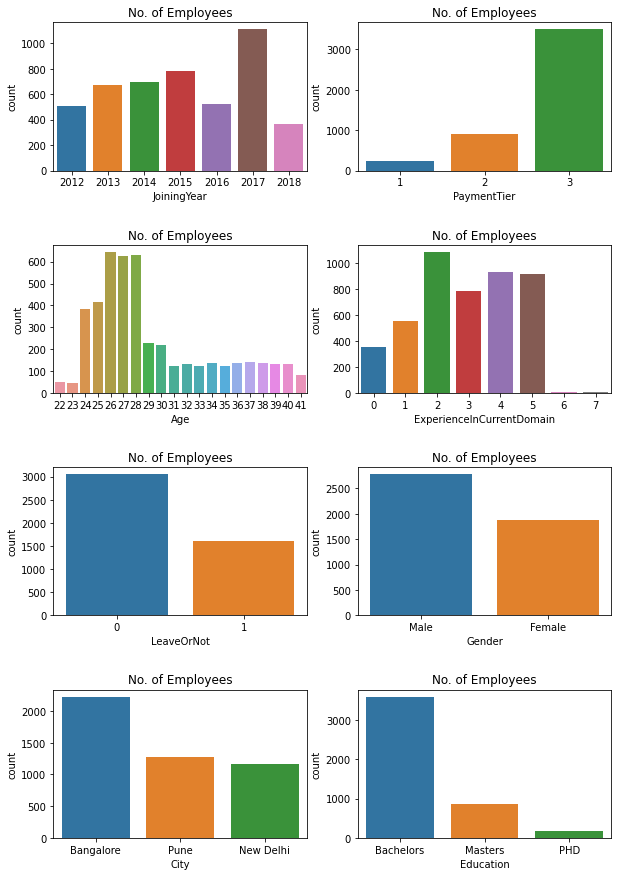

In [ ]:
#to plotsubplots 
import seaborn as sns
features=['JoiningYear','PaymentTier','Age','ExperienceInCurrentDomain','LeaveOrNot','Gender','City','Education']
fig=plt.subplots(figsize=(10,15))
for(i,j) in enumerate(features):
  plt.subplot(4,2,i+1)
  plt.subplots_adjust(hspace=0.5)
  sns.countplot(x=j,data=csv_file)
  plt.title("No. of Employees")


In [ ]:
#To prepare prediction model using labelencoding to convert categorical values into numerical values
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
csv_file['City']=label_encoder.fit_transform(csv_file['City']) #Banglore=0,Pune=2,New Delhi=1
csv_file['Gender']=label_encoder.fit_transform(csv_file['Gender']) #Male=1 Female=0
csv_file['Education']=label_encoder.fit_transform(csv_file['Education']) #Bachelors=0 Masters=1 PHD=2
#to split data and label
data=csv_file[['Gender','Age','Education','City','JoiningYear','ExperienceInCurrentDomain','PaymentTier']]
label=csv_file['LeaveOrNot']

#to split data into train and test
from sklearn.model_selection import train_test_split
data_train,data_test,label_train,label_test=train_test_split(data,label,test_size=0.1,random_state=4)

#to train the model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(data_train,label_train)

#to test the model
label_predict=linreg.predict(data_test)

#to display the accuracy
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(label_test,label_predict)
rmse=sqrt(mse)
print("The root mean squared error is:",rmse,"%")
print("The accuracy is:",(100-rmse),"%")

The root mean squared error is: 0.4491727777105922 %
The accuracy is: 99.55082722228941 %


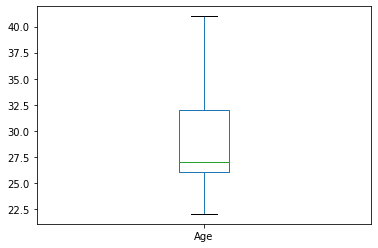

In [ ]:
#to plot the box plot of persons leaving as per age
import matplotlib.pyplot as plt
left_emp=csv_file["Age"][csv_file.LeaveOrNot==1]

left_emp.plot.box()
